# [Программирование на Python (SCS)](https://compscicenter.ru/courses/python/2015-autumn/classes/)

### Лектор Сергей Лебедев. Дата проведения лекции - 23 ноября 2015

# 11. Тестирование

### Тестировать или не тестировать? 

`Здесь и далее под тестированием имеется в виду модульное (и иногда
интеграционное) тестирование aka unit testing`

Тестировать:
- тесты проверяют корректность кода
- и позволяют бесстрашно изменять код даже в больших
проектах.

Не тестировать:
- написание тестов требует времени,
- нередко в проекте тестов больше чем кода,
- работающие тесты не гарантируют корректность.

Тем не менее, ответ очевиден: конечно же тестировать!

In [4]:
import itertools
def rle(iterable):
    """Applies run-length encoding to an iterable"""
    for item, g in itertools.groupby(iterable):
        yield item, sum(1 for _ in g)
        
list(rle("mississipi"))

[('m', 1),
 ('i', 1),
 ('s', 2),
 ('i', 1),
 ('s', 2),
 ('i', 1),
 ('p', 1),
 ('i', 1)]

# Слайд 3. Тестирование с помощью print
Функция **print** позволяет организовать
полуавтоматическое тестирование вне интерактивной
оболочки.
- Интерпретатор печатает — вы проверяете:

In [5]:
def test_rle():
    print(list(rle("mississippi")))
test_rle()

[('m', 1), ('i', 1), ('s', 2), ('i', 1), ('s', 2), ('i', 1), ('p', 2), ('i', 1)]


In [9]:
identity = trace(identity)
identity.__name__, identity.__doc__

('inner', None)

# Слайд 4. Доктесты
 https://docs.python.org/3/library/doctest

In [17]:
import doctest
import itertools
def rle(iterable):
    """Applies run-length encoding to an iterable.
    >>> list(rle(""))
    []
    >>> list(rle("mississippi"))
    [('m', 1), ('i', 1), ('s', 2), ('i', 1), 
    ('s', 2), ('i', 1), ('p', 2), ('i', 1)]
    """
    for item, g in itertools.groupby(iterable):
        yield item, sum(1 for _ in g)
        
if __name__ == "__main__":
    doctest.testmod()

**********************************************************************
File "__main__", line 7, in __main__.rle
Failed example:
    list(rle("mississippi"))
Expected:
    [('m', 1), ('i', 1), ('s', 2), ('i', 1), 
    ('s', 2), ('i', 1), ('p', 2), ('i', 1)]
Got:
    [('m', 1), ('i', 1), ('s', 2), ('i', 1), ('s', 2), ('i', 1), ('p', 2), ('i', 1)]
**********************************************************************
1 items had failures:
   1 of   2 in __main__.rle
***Test Failed*** 1 failures.


Директивы позволяют изменить то, как doctest сравнивает ожидаемый вывод интерпретатора с фактическим.

Например, директива `NORMALIZE_WHITESPACE` нормализует пробельные символы перед сравнением:


In [22]:
list(rle("mississippi"))
... # doctest: +NORMALIZE_WHITESPACE

[('m', 1),
 ('i', 1),
 ('s', 2),
 ('i', 1),
 ('s', 2),
 ('i', 1),
 ('p', 2),
 ('i', 1)]

А директива `ELLIPSIS` позволяет использовать символ ... ,
который совпадает с любой строкой:

In [21]:
list(rle("mississippi"))
... # doctest: +ELLIPSIS

[('m', 1),
 ('i', 1),
 ('s', 2),
 ('i', 1),
 ('s', 2),
 ('i', 1),
 ('p', 2),
 ('i', 1)]

Модуль **doctest** позволяет проверить реализацию функции
на соответствие записанному сеансу интерпретатора.
Плюсы:
- доступен в стандартной библиотеке,
- решает задачу тестирования для небольших проектов,
- доктесты их легко читать,
- примеры кода в документации всегда актуальны.
 
 
Минусы:
- доктесты требуют, чтобы у результата было содержательное
строковое представление,
- длинные доктесты ухудшают читаемость документации,
- нет способа запустить подмножество доктестов,
- если в середине доктеста произошла ошибка, оставшаяся
часть не выполнится.

# Cлайд 7. Assert
Напоминание:
- оператор assert принимает два аргумента: условие и
произвольное значение,
- если условие falsy, оператор поднимает исключение
**AssertionError **

In [24]:
assert [], 42

AssertionError: 42

In [27]:
# Протестируем функцию rle :
def test_rle():
    s = "mississippi"
    tmp = set(ch for ch, _count in rle(s))
    assert tmp == set(s[:-1] + s[1])
    assert not list(rle(""))

test_rle()

In [36]:
s = "mississippi"
set(ch for ch, _count in rle(s))

{'i', 'm', 'p', 's'}

In [40]:
list(rle(""))


[]

# Слайд 9. Признаки хорошего теста
Хороший тест:
- корректный,
- понятный читателю,
- конкретный, то есть проверяет что-то одно.


Попробуем улучшить тест для функции rle 



In [42]:
def test_rle():
    assert rle("mississippi") == [
        ('m', 1), ('i', 1), ('s', 2), ('i', 1),
        ('s', 2), ('i', 1), ('p', 2), ('i', 1)
        ]

def test_rle_empty():
    assert not list(rle(""))

test_rle_empty()
test_rle()

AssertionError: 

In [44]:
# Второй аргумент оператора assert используется для
# сообщения об ошибке:
def test_rle():
    actual = rle("mississippi")
    expected = [
        ('m', 1), ('i', 1), ('s', 2), ('i', 1),
        ('s', 2), ('i', 1), ('p', 2), ('i', 1)
        ]
    message = "{} != {}".format(actual, expected)
    assert actual == expected, message

test_rle()

AssertionError: <generator object rle at 0x7f18f5a88570> != [('m', 1), ('i', 1), ('s', 2), ('i', 1), ('s', 2), ('i', 1), ('p', 2), ('i', 1)]

# Слайд 11. Функция assert_equal

Добавим сообщение об ошибке к тесту `test_rle_empty `

In [87]:
def test_rle_empty(): # ^C/^V
    actual = list(rle(""))
    expected = []
    message = "{} != {}".format(actual, expected)
    assert actual == expected, message
    
# Самое время вынести логику сравнения в отдельную
# функцию:
def assert_equal(x, y):
    assert x == y, "{} != {}".format(x, y)

<font color=blue>Вопрос</font>:<br> 
что делать, если мы также хотим проверять
утверждения вида `("a", 2) in rle(...)`? 

# Слайд 12. assert: резюме

Оператор assert можно использовать для написания
тестов.
Плюсы:
- тесты c assert легко читать,
- они не используют ничего кроме стандартных средств
языка,
- в отличие от доктестов это обычные функции.

Минусы:
- запускать тесты нужно вручную,
- их сложно отлаживать, потому что
 для каждого типа утверждения приходится самостоятельно
конструировать сообщение об ошибке.

# Cлайд 13. Модуль unittest
 https://docs.python.org/3/library/unittest
 
Модуль unittest реализует функциональность JUnit для
тестирования кода на Python.
- Наследие Java до сих пор в обилии присутствует в API.
- Перепишем имеющиеся тесты с использованием unittest 
    

In [46]:
import unittest

class TestHomework(unittest.TestCase):
    def test_rle(self):
        self.assertEqual(rle("mississippi"), [...])
        
    def test_rle_empty(self):
        self.assertEqual(list(rle("")), [])
        
if __name__ == "__main__":
    unittest.main()

E
ERROR: /home/nenu/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/home/nenu/'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

/home/nenu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Cлайд 15. Функция unittest.main

Функция unittest.main загружает все тесты текущего
модуля и запускает их.
- Тест — метод экземпляра unittest.TestCase ,
начинающийся на test .
- При необходимости тесты можно объединять в группы с
помощью класса unittest.TestSuite :
```
suite = unittest.TestSuite([
    TestHomework(),
    TestSomethingElse()
])
```
- Указывать вручную, что нужно запустить довольно досадно.

Вопрос: можно ли лучше?

# Слайд 17. Методы unittest.TestCase
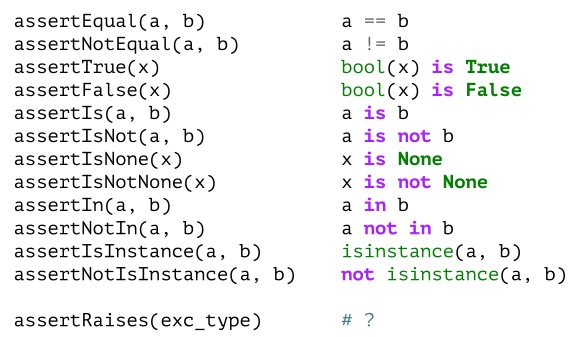

# Слайд 18. Модуль unittest и контекст
? aka fixtures — способ подготовить контекст, в котором
будут запускаться тесты.
- Это можно использовать, например, для работы с
ресурсами: сокетами, файлами, временными
директориями.

Пример:

In [47]:
class TestHomeworkWithOracle(unittest.TestCase):
    def setUp(self):
        self.oracle = RleOracle("http://oracle.rle.com")
    def test_rle_against_oracle(self):
        s = "mississippi"
        self.assertEqual(list(rle(s)), self.oracle(s))
    def tearDown(self):
        self.oracule.close()

# Слайд 19. Модуль unittest: резюме
Модуль **unittest** — клон JUnit для Python.

Мы обсудили
- основные сущности unittest ,
- как писать и запускать тесты,
- какие полезные методы имеются в классе `unittest.TestCase` .

Плюсы:
- доступен в стандартной библиотеке,
- выводит понятные сообщения об ошибках,
- умеет автоматически находить тесты.

Минусы:
- API унаследован от Java,
- заставляет писать много лишнего кода,
- читать **unittest** тесты сложнее, чем доктесты и тесты,
использующие assert 

# Слайд 20. Пакет py.test
 https://pytest.org
 
Пакет `py.test` — популярная альтернатива **unittest** для
написания и запуска тестов.
- Отличительная особенность `py.test` — практически
полное отсутствие API: тесты можно писать, используя
стандартные средства языка.

In [48]:
def test_rle():
    assert rle("mississippi") == [
        ('m', 1), ('i', 1), ('s', 2), ('i', 1),
        ('s', 2), ('i', 1), ('p', 2), ('i', 1)
    ]
    
def test_rle_empty():
    assert not list(rle(""))
    
#  python -m pytest -q test_pytest.py

# Слайд 22. Пакет py.test: интерфейс командной строки
Запустить `py.test` можно 1001 способом, например:
- найти тесты в текущей директории и во всех вложенных
директориях и запустить их:<br>
```$ python -m pytest```
- найти и запустить тесты в указанном файле:<br>
```$ python -m pytest test_pytest.py```
- запустить один тест в файле по имени:<br>
```$ python -m pytest test_pytest.py::test_rle```

Что такое тест для `py.test`?  
https://pytest.org/latest/goodpractises.html
- функция test_* ,
- метод test_* в классе Test* или в классе, наследующемся
от unittest.TestCase ,
- доктест, если py.test был запущен с параметром
```--doctest-modules ```

# Слайд 24.Возможности py.test: raises

In [49]:
def  test_undo_dict_exceptions():
    d = UndoDict()
    with pytest.raises(KeyError):
        d["foo"]



# Слайд 25. Возможности py.test: параметрические тесты

Параметрические тесты позволяют писать тесты, которые работают с разными данными

In [60]:
def cut_suffix(s, suffix):
    """Принимает строку, суффикс и возвращает строку без суффикса
    
    - намеренно неверная реализация, чтобы тест сработал.
    Ошибка в том, что rfind возвращает -1 если ничего не нашел, а в слайсе это
    предпоследний элемент
    """
    return s[:s.rfind(suffix)]

In [62]:
s = "refrigerator"
cut_suffix(s, "or")

'refrigerat'

In [66]:
s = "foobar"
cut_suffix(s, "boo")

'fooba'

In [68]:
s.rfind("boo")

-1

In [69]:
# Тестируем cut_suffix с помощью параметрического теста:
import pytest
@pytest.mark.parametrize("s,suffix,expected", [
    ("foobar", "bar", "foo"),
    ("foobar", "boo", "foobar"),
    ("foobarbar", "bar", "foobar")
])
def test_ctu_suffix(s, suffix, expected):
    assert cut_suffix(s, suffix) == expected
   

# Слайд 29. -------------------
• С помощью функции partial можно зафиксировать часть
позиционных и ключевых аргументов в функции.

• Выполнившие домашнее задание узнают в partial
расширение функции curry.

In [19]:
f = functools.partial(sorted, key=lambda p: p[1])
f([("a", 4), ("b", 2)])

[('b', 2), ('a', 4)]

In [20]:
g = functools.partial(sorted, [2, 3, 1, 4])
g()

[1, 2, 3, 4]

In [27]:
# Функция пребразует строки, записанные в двоичном формате в целое число
ff = functools.partial(int, base=2)
ff('101011')

43

# Слайд 30. Обобщённые (мультиметоды) функции
Функция len называется обобщённой, так как её
реализация может быть специализирована для
конкретного типа
```
>>> len([1, 2, 3, 4])
4
>>> len({1, 2, 3, 4})
4
>>> len(range(4))
4
• Примеры обобщённых функций в Python:
>>> str([1, 2, 3, 4])
'[1, 2, 3, 4]'
>>> hash((1, 2, 3, 4))
485696759010151909
>>> sum([[1], [2]], [])
[1, 2]
• Как реализовать свою обобщённую функцию?
```

# Слайд 30. singledispatch 
- декоратор, который позволяет писать функции, которые по-разному работают, в зависимости от передаваемых аргументов.
Для примера напишем функцию, которая упаковывает переданное её значение в бинарную строку (серилизует).


In [28]:
# Базовая ф-ия для случаев, если остальные не подошли
# Вызываем assert и пишем "неподходящий тип"
@functools.singledispatch
def pack(obj): 
    type_name = type(obj).__name__
    assert False, "Unsupported type: " + type_name
    
#  Далее перечисляем особые случаи - для каждого типа своя ф-ия:
@pack.register(int)
def _(obj):
    return b"I" + hex(obj).encode("ascii")

@pack.register(list)
def _(obj):
    return b"L" + b",".join(map(pack, obj))

pack([1, 2, 4])

b'LI0x1,I0x2,I0x4'

In [29]:
# При передаче неподдерживаего типа - ошибка
pack(42.)

AssertionError: Unsupported type: float

# Слайд 32. Свёртка, мотивация для reduce

In [33]:
# Функцию суммирования
sum([1, 2, 3, 4])
# можно записать скобочками:
(((0 + 1) + 2) + 3) + 4

10

In [35]:
# Что если мы захотим использовать другую бинарную 
# операцию, например, умножение?
(((1 * 1) * 2) * 3) * 4

24

In [71]:
# То, что знак + может быть легко заменён другой операцией без изменения
# порядка вычеслений, называется `левой свёрткой` = reduce:
functools.reduce(lambda acc, x: acc + x, [1, 2, 3, 4])

10

# примеры применения reduce:
Функция reduce принимает три аргумента: бинарную
функцию и последовательность.

• Вычисление reduce(op, xs) можно схематично
представить как:
```
op(op(op(op(xs[0]), xs[1]), xs[2]), ...)
op(op(op(xs[0], xs[1]), xs[2]), ...)```

In [18]:
functools.reduce(lambda acc, s: 10*acc + int(s), [1, 13])

23

In [17]:
# Преобразование строки с числом в инт (извращенный эквивалент int("1912"))
#      acc  +  s  =  result
# 1.    0      1       1
# 1.  1*10     9       19
# 1.  19*10    1       191
# 1.  191*10   2       1912

functools.reduce(lambda acc, s: 10*int(acc) + int(s), "1912")

1912

In [82]:
# ф-я merge, которая сливает два сортиррованных списка
def merge(list1, list2):
    return sorted(list1 + list2)

# можно обобщить на произвольное количество списков
functools.reduce(merge, [[1, 2, 7], [5, 6], [0]])

[0, 1, 2, 5, 6, 7]

# reduce: резюме
• Несмотря на свою популярность в функциональных
языках, в Python довольно сложно придумать полезный
пример использования reduce.

• Резюме про reduce:
- работает с любым объектом, поддерживающим протокол
итератора;
- работает слева направо;
- использует первый элемент последовательности, если
начальное значение не указано явно.

# functools: резюме
• Модуль functools украшает будни любителя
функционального программирования.

• Мы поговорили про:
- lru_cache
- partial
- singledispatch
- reduce